In [1]:
#Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define paths to training and validation data
train_data_dir = "/home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/realism/train/"
valid_data_dir = "/home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/realism/valid/"

# Define constants
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 32
NUM_EPOCHS = 25

# Create data generators with data augmentation for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

2024-05-09 05:13:06.794473: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-09 05:13:07.261087: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 10248 images belonging to 2 classes.


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2024-05-09 05:13:09.911232: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-09 05:13:09.941874: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-09 05:13:09.942075: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
valid_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary')

# Load the VGG16 model pre-trained on ImageNet without the top layer
base_model = VGG16(weights='imagenet', include_top=False)


# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer
x = Dense(1024, activation='relu')(x)

# Add a logistic layer -- the output layer
predictions = Dense(1, activation='sigmoid')(x)

# Model to train
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers in the base VGG16 model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // BATCH_SIZE
)

Found 2000 images belonging to 2 classes.


2024-05-09 05:13:14.872953: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-09 05:13:14.873173: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-09 05:13:14.873332: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Epoch 1/25


/home/millenium-falcon/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1715242397.691062  165443 service.cc:145] XLA service 0x702e1000c600 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715242397.691087  165443 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2024-05-09 05:13:17.710445: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-09 05:13:17.865344: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906
I000

  1/320 ━━━━━━━━━━━━━━━━━━━━ 39:44 7s/step - accuracy: 0.5312 - loss: 0.7054

I0000 00:00:1715242403.050943  165443 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


320/320 ━━━━━━━━━━━━━━━━━━━━ 70s 195ms/step - accuracy: 0.8678 - loss: 0.2934 - val_accuracy: 0.9546 - val_loss: 0.1158
Epoch 2/25
  1/320 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9375 - loss: 0.1922

2024-05-09 05:14:25.430026: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-09 05:14:25.430050: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1634832345499849905
2024-05-09 05:14:25.430061: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9375 - loss: 0.1922 - val_accuracy: 0.9375 - val_loss: 0.1425
Epoch 3/25


2024-05-09 05:14:27.971436: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 05:14:27.971459: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-09 05:14:27.971468: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12126356906347395461
2024-05-09 05:14:27.971475: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1634832345499849905


320/320 ━━━━━━━━━━━━━━━━━━━━ 61s 186ms/step - accuracy: 0.9377 - loss: 0.1530 - val_accuracy: 0.9577 - val_loss: 0.1135
Epoch 4/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 89us/step - accuracy: 0.9062 - loss: 0.1497 - val_accuracy: 0.9375 - val_loss: 0.0972
Epoch 5/25


2024-05-09 05:15:29.009396: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 05:15:29.009424: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-09 05:15:29.009442: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1634832345499849905
2024-05-09 05:15:29.032437: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 05:15:29.032451: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-09 05:15:29.032458: I tensorflow/core/framework/local_ren

320/320 ━━━━━━━━━━━━━━━━━━━━ 61s 187ms/step - accuracy: 0.9441 - loss: 0.1373 - val_accuracy: 0.9587 - val_loss: 0.1075
Epoch 6/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 93us/step - accuracy: 0.9062 - loss: 0.2977 - val_accuracy: 0.9375 - val_loss: 0.1221
Epoch 7/25


2024-05-09 05:16:30.347177: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 05:16:30.347198: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-09 05:16:30.347207: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12126356906347395461
2024-05-09 05:16:30.347217: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1634832345499849905
2024-05-09 05:16:30.371383: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-09 05:16:30.371402: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous i

320/320 ━━━━━━━━━━━━━━━━━━━━ 62s 188ms/step - accuracy: 0.9509 - loss: 0.1210 - val_accuracy: 0.9617 - val_loss: 0.1009
Epoch 8/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 90us/step - accuracy: 0.9375 - loss: 0.1458 - val_accuracy: 1.0000 - val_loss: 0.0778
Epoch 9/25


2024-05-09 05:17:32.031592: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 05:17:32.031615: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-09 05:17:32.031625: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12126356906347395461
2024-05-09 05:17:32.031635: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1634832345499849905
2024-05-09 05:17:32.054701: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 05:17:32.054722: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: O

320/320 ━━━━━━━━━━━━━━━━━━━━ 61s 187ms/step - accuracy: 0.9573 - loss: 0.1151 - val_accuracy: 0.9667 - val_loss: 0.0822
Epoch 10/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 91us/step - accuracy: 1.0000 - loss: 0.0307 - val_accuracy: 0.9375 - val_loss: 0.1554
Epoch 11/25


2024-05-09 05:18:33.374485: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 05:18:33.374504: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-09 05:18:33.374514: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12126356906347395461
2024-05-09 05:18:33.374524: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1634832345499849905
2024-05-09 05:18:33.397972: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 05:18:33.397990: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: O

320/320 ━━━━━━━━━━━━━━━━━━━━ 61s 186ms/step - accuracy: 0.9545 - loss: 0.1163 - val_accuracy: 0.9622 - val_loss: 0.0974
Epoch 12/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 88us/step - accuracy: 0.9688 - loss: 0.1502 - val_accuracy: 0.9375 - val_loss: 0.0647
Epoch 13/25


2024-05-09 05:19:34.209650: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 05:19:34.209671: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-09 05:19:34.209688: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1634832345499849905
2024-05-09 05:19:34.232736: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 05:19:34.232756: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


320/320 ━━━━━━━━━━━━━━━━━━━━ 62s 191ms/step - accuracy: 0.9613 - loss: 0.1021 - val_accuracy: 0.9572 - val_loss: 0.1059
Epoch 14/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 98us/step - accuracy: 0.9062 - loss: 0.1468 - val_accuracy: 0.9375 - val_loss: 0.1366
Epoch 15/25


2024-05-09 05:20:36.739390: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 05:20:36.739413: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-09 05:20:36.762682: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 05:20:36.762697: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-09 05:20:36.762707: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12126356906347395461
2024-05-09 05:20:36.762717: I tensorflow/core/framework/local_re

320/320 ━━━━━━━━━━━━━━━━━━━━ 61s 186ms/step - accuracy: 0.9559 - loss: 0.1174 - val_accuracy: 0.9728 - val_loss: 0.0777
Epoch 16/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 91us/step - accuracy: 1.0000 - loss: 0.0454 - val_accuracy: 1.0000 - val_loss: 0.0116
Epoch 17/25


2024-05-09 05:21:37.577360: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 05:21:37.577386: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-09 05:21:37.577399: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12126356906347395461
2024-05-09 05:21:37.577414: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1634832345499849905
2024-05-09 05:21:37.600799: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 05:21:37.600817: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key h

320/320 ━━━━━━━━━━━━━━━━━━━━ 62s 188ms/step - accuracy: 0.9589 - loss: 0.1053 - val_accuracy: 0.9693 - val_loss: 0.0742
Epoch 18/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 94us/step - accuracy: 1.0000 - loss: 0.0348 - val_accuracy: 1.0000 - val_loss: 0.0214
Epoch 19/25


2024-05-09 05:22:39.330480: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 05:22:39.330502: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-09 05:22:39.330512: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12126356906347395461
2024-05-09 05:22:39.330522: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1634832345499849905
2024-05-09 05:22:39.353951: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 05:22:39.353974: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: O

320/320 ━━━━━━━━━━━━━━━━━━━━ 60s 185ms/step - accuracy: 0.9610 - loss: 0.0992 - val_accuracy: 0.9652 - val_loss: 0.0891
Epoch 20/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 92us/step - accuracy: 0.8125 - loss: 0.3127 - val_accuracy: 1.0000 - val_loss: 0.0515
Epoch 21/25


2024-05-09 05:23:39.893087: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 05:23:39.893111: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-09 05:23:39.916399: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 05:23:39.916416: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


320/320 ━━━━━━━━━━━━━━━━━━━━ 61s 186ms/step - accuracy: 0.9605 - loss: 0.1012 - val_accuracy: 0.9763 - val_loss: 0.0657
Epoch 22/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 92us/step - accuracy: 0.9062 - loss: 0.1815 - val_accuracy: 0.9375 - val_loss: 0.0888
Epoch 23/25


2024-05-09 05:24:40.792385: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 05:24:40.792406: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-09 05:24:40.792415: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12126356906347395461
2024-05-09 05:24:40.792424: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1634832345499849905
2024-05-09 05:24:40.815356: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 05:24:40.815376: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: O

320/320 ━━━━━━━━━━━━━━━━━━━━ 60s 184ms/step - accuracy: 0.9638 - loss: 0.0959 - val_accuracy: 0.9466 - val_loss: 0.1350
Epoch 24/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 93us/step - accuracy: 0.9688 - loss: 0.1527 - val_accuracy: 0.9375 - val_loss: 0.1419
Epoch 25/25


2024-05-09 05:25:41.019527: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 05:25:41.019551: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-09 05:25:41.042935: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 05:25:41.042950: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-09 05:25:41.042960: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12126356906347395461
2024-05-09 05:25:41.042970: I tensorflow/core/framework/local_re

320/320 ━━━━━━━━━━━━━━━━━━━━ 61s 187ms/step - accuracy: 0.9655 - loss: 0.0910 - val_accuracy: 0.9748 - val_loss: 0.0664


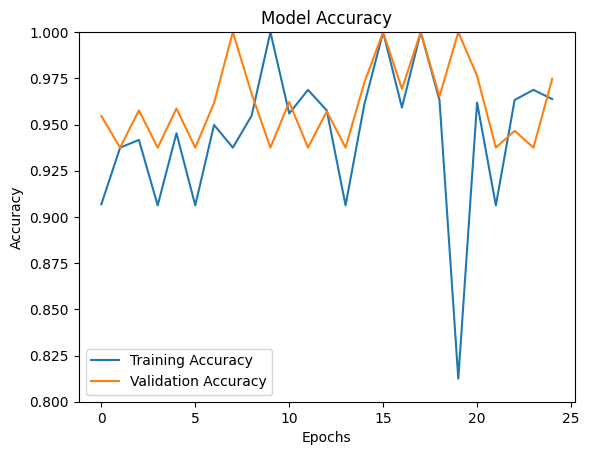

In [4]:
# Plot the accuracy graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)  # Adjust the upper limit of the y-axis
plt.title('Model Accuracy')
plt.legend()
plt.show()

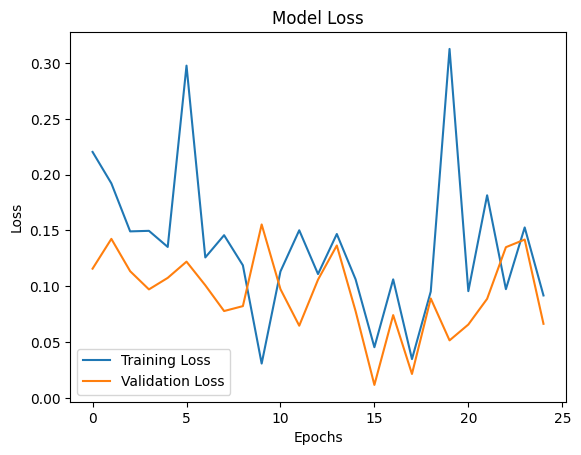

In [5]:
# Plot the Loss graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

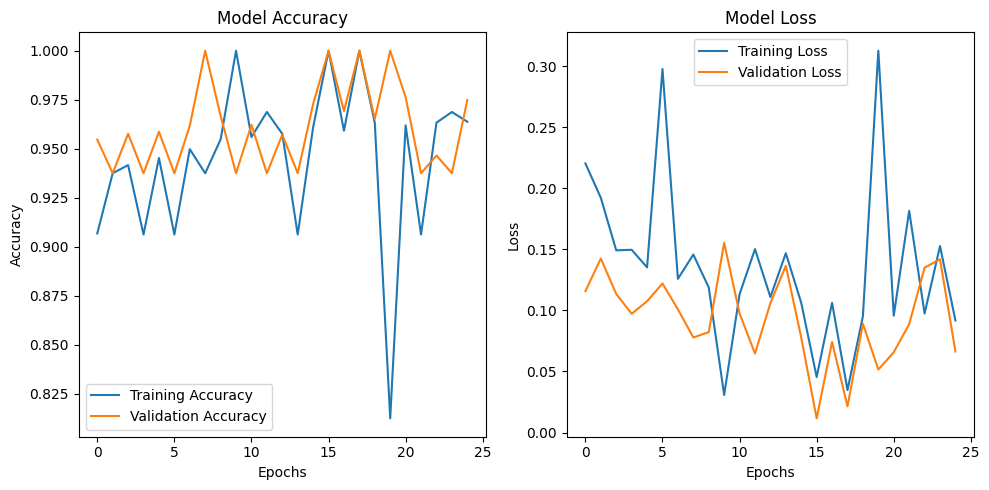

In [7]:
# Accuracy vs Loss

# Plotting accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Save weights to save compute time
model.save_weights('weights_VGG16.h5')
